In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import re

In [8]:
x, y, r, theta, phi = sp.symbols('x y r theta phi')

allowed_functions = {
    'sin': sp.sin,
    'cos': sp.cos,
    'tan': sp.tan,
    'exp': sp.exp,
    'log': sp.log,
    'sqrt': sp.sqrt,
    'ln': sp.ln,
}

def get_graph_type():
    while True:
        graph_type = input("Selecciona el tipo de gráfica (2D o 3D): ").strip().lower()
        if graph_type in ['2d', '3d']:
            return graph_type
        else:
            print("Tipo de gráfica no válido. Inténtalo de nuevo.")


def get_2d_coordinate_system():
    while True:
        system = input("Elige el sistema de coordenadas para 2D (cartesianas, polares): ").strip().lower()
        if system in ['cartesianas', 'polares']:
            return system
        else:
            print("Sistema de coordenadas no disponible. Vuelve a intentarlo.")

def get_function_2d(coordinate_system):
    while True:
        try:
            if coordinate_system == 'cartesianas':
                expression = input("Introduce la función en términos de x (por ejemplo, sin(x) + cos(x)): ")
                allowed_symbols = {x}
            else:
                expression = input("Introduce la función en términos de theta (por ejemplo, sin(theta) + cos(theta)): ")
                allowed_symbols = {theta}

            # Encuentra todas las funciones en la expresión del usuario
            functions_in_expression = set(re.findall(r'\b\w+\s*(?=\()', expression))

            # Verifica si todas las funciones están en el diccionario de funciones permitidas
            if not all(func in allowed_functions for func in functions_in_expression):
                print("La función contiene funciones no permitidas. Inténtalo de nuevo.")
                continue

            # Reemplaza los nombres de las funciones en la entrada del usuario con la versión sympy correspondiente
            for func in allowed_functions:
                expression = re.sub(rf'\b{func}\b', f'allowed_functions["{func}"]', expression)

            parsed_expression = sp.parse_expr(expression, local_dict={'allowed_functions': allowed_functions, 'x': x, 'y': y, 'r': r, 'theta': theta, 'phi': phi})

            # Obtén todos los símbolos en la expresión
            symbols_in_expression = parsed_expression.free_symbols

            # Verifica si todos los símbolos en la expresión están en el conjunto de símbolos permitidos
            if all(symbol in allowed_symbols for symbol in symbols_in_expression):
                return parsed_expression
            else:
                print("La función contiene variables no permitidas. Inténtalo de nuevo.")
        except:
            print("Expresión no válida. Asegúrate de usar funciones y símbolos permitidos. Por favor, inténtalo de nuevo.")


def get_3d_coordinate_system():
    while True:
        system = input("Elige el sistema de coordenadas (rectangulares, cilindricas, esfericas): ").strip().lower()
        if system in ['rectangulares', 'cilindricas', 'esfericas']:
            return system
        else:
            print("Sistema de coordenadas no disponible. Vuelve a intentarlo.")

def get_function_3d():
    while True:
        try:
            expression = input("Introduce la función en términos de x, y, r, theta, o phi (por ejemplo, sin(x) + cos(y)): ")

            # Encuentra todas las funciones en la expresión del usuario
            functions_in_expression = set(re.findall(r'\b\w+\b(?=\()', expression))

            # Verifica si todas las funciones están en el diccionario de funciones permitidas
            if not all(func in allowed_functions for func in functions_in_expression):
                print("La función contiene funciones no permitidas. Inténtalo de nuevo.")
                continue

            # Reemplaza los nombres de las funciones en la entrada del usuario con la versión sympy correspondiente
            for func in allowed_functions:
                expression = re.sub(rf'\b{func}\b', f'allowed_functions["{func}"]', expression)

            parsed_expression = sp.parse_expr(expression, local_dict={'allowed_functions': allowed_functions, 'x': x, 'y': y, 'r': r, 'theta': theta, 'phi': phi})

            # Obtén todos los símbolos en la expresión
            symbols_in_expression = parsed_expression.free_symbols

            # Define un conjunto de símbolos permitidos
            allowed_symbols = {x, y, r, theta, phi}

            # Verifica si todos los símbolos en la expresión están en el conjunto de símbolos permitidos
            if all(symbol in allowed_symbols for symbol in symbols_in_expression):
                return parsed_expression
            else:
                print("La función contiene variables no permitidas. Inténtalo de nuevo.")
        except:
            print("Expresión no válida. Asegúrate de usar funciones y símbolos permitidos. Por favor, inténtalo de nuevo.")

In [9]:
def plot_cartesian(f):
    x = sp.symbols('x')
    x_range = np.linspace(-10, 10, 100)

    # Verificamos si f es una constante
    if len(f.free_symbols) == 0:
        # Creamos un arreglo y llenado con el valor de la constante
        y_values = np.full_like(x_range, float(f))
    else:
        f_eval = sp.lambdify(x, f, 'numpy')
        y_values = f_eval(x_range)

    plt.figure()
    plt.plot(x_range, y_values)

    plt.title("Coordenadas Cartesianas 2D")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")

    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

    display(Math(f"y = {sp.latex(f)}"))
    plt.show()


def plot_polar(f):
    theta_range = np.linspace(0, 2*np.pi, 1000)

    # Verificamos si f es una constante
    if len(f.free_symbols) == 0:
        # Creamos un arreglo y llenado con el valor de la constante
        r_values = np.full_like(theta_range, float(f))
    else:
        f_eval = sp.lambdify(theta, f, 'numpy')
        r_values = f_eval(theta_range)

    plt.figure()
    plt.polar(theta_range, r_values)

    plt.title("Gráfico 2D en Coordenadas Polares")
    display(Math(f"r(\\theta) = {sp.latex(f)}"))
    plt.grid(True)
    plt.show()


def plot_rectangular(f):
    x, y = sp.symbols('x y')
    x_range = np.linspace(-10, 10, 100)
    y_range = np.linspace(-10, 10, 100)

    # Verificamos si f es una constante
    if len(f.free_symbols) == 0:
        # Creamos un arreglo y llenado con el valor de la constante
        x_values, y_values = np.meshgrid(x_range, y_range)
        z_values = np.full_like(x_values, float(f))
    else:
        f_eval = sp.lambdify((x, y), f, 'numpy')
        x_values, y_values = np.meshgrid(x_range, y_range)
        z_values = f_eval(x_values, y_values)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_values, y_values, z_values, cmap="viridis")
    ax.set_title("Coordenadas Cartesianas")
    ax.set_xlabel("Eje x")
    ax.set_ylabel("Eje y")
    ax.set_zlabel("Eje z")
    display(Math(f"z = {sp.latex(f)}"))
    plt.show()


def plot_cylindrical(f):
    x, y, r, theta = sp.symbols('x y r theta')
    r_range = np.linspace(0, 10, 100)
    theta_range = np.linspace(0, 2*np.pi, 100)

    x_cyl = r * sp.cos(theta)
    y_cyl = r * sp.sin(theta)
    f_cyl = f.subs([(x, x_cyl), (y, y_cyl)])

    # Verificamos si f es una constante
    if len(f.free_symbols) == 0:
        r_values, theta_values = np.meshgrid(r_range, theta_range)
        x_values = r_values * np.cos(theta_values)
        y_values = r_values * np.sin(theta_values)
        z_values = np.full_like(x_values, float(f))
    else:
        f_cyl_eval = sp.lambdify((r, theta), f_cyl, 'numpy')
        r_values, theta_values = np.meshgrid(r_range, theta_range)
        x_values = r_values * np.cos(theta_values)
        y_values = r_values * np.sin(theta_values)
        z_values = f_cyl_eval(r_values, theta_values)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_values, y_values, z_values, cmap="viridis")
    ax.set_title("Coordenadas Cilíndricas")
    ax.set_xlabel("Eje x")
    ax.set_ylabel("Eje y")
    ax.set_zlabel("Eje z")
    display(Math(f"z = {sp.latex(f_cyl)}"))
    plt.show()


def plot_spherical(f):
    x, y, r, theta, phi = sp.symbols('x y r theta phi')
    theta_range = np.linspace(0, 2*np.pi, 100)
    phi_range = np.linspace(0, np.pi, 100)

    x_sph = r * sp.sin(phi) * sp.cos(theta)
    y_sph = r * sp.sin(phi) * sp.sin(theta)
    f_sph = f.subs([(x, x_sph), (y, y_sph)])

    # Verificamos si f es una constante
    if len(f.free_symbols) == 0:
        theta_values, phi_values = np.meshgrid(theta_range, phi_range)
        r_values = np.full_like(theta_values, 10)
        x_values = r_values * np.sin(phi_values) * np.cos(theta_values)
        y_values = r_values * np.sin(phi_values) * np.sin(theta_values)
        z_values = np.full_like(x_values, float(f))
    else:
        f_sph_eval = sp.lambdify((r, theta, phi), f_sph, 'numpy')
        theta_values, phi_values = np.meshgrid(theta_range, phi_range)
        r_values = np.full_like(theta_values, 10)
        x_values = r_values * np.sin(phi_values) * np.cos(theta_values)
        y_values = r_values * np.sin(phi_values) * np.sin(theta_values)
        z_values = f_sph_eval(r_values, theta_values, phi_values)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_values, y_values, z_values, cmap="viridis")
    ax.set_title("Coordenadas Esféricas")
    ax.set_xlabel("Eje x")
    ax.set_ylabel("Eje y")
    ax.set_zlabel("Eje z")
    display(Math(f"z = {sp.latex(f_sph)}"))
    plt.show()

In [10]:
def main():
    graph_type = get_graph_type()

    if graph_type == '2d':
        coord_sys = get_2d_coordinate_system()
        f = get_function_2d(coord_sys)
    else:
        coord_sys = get_3d_coordinate_system()
        f = get_function_3d()

    if graph_type == '2d':
        if coord_sys == 'cartesianas':
            plot_cartesian(f)
        elif coord_sys == 'polares':
            plot_polar(f)
    elif graph_type == '3d':
        if coord_sys == 'rectangulares':
            plot_rectangular(f)
        elif coord_sys == 'cilindricas':
            plot_cylindrical(f)
        elif coord_sys == 'esfericas':
            plot_spherical(f)

<IPython.core.display.Math object>

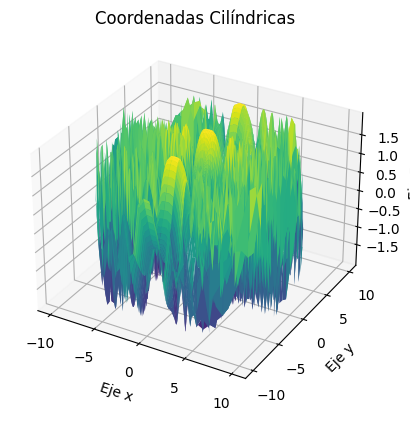

In [11]:
if __name__ == "__main__":
    main()

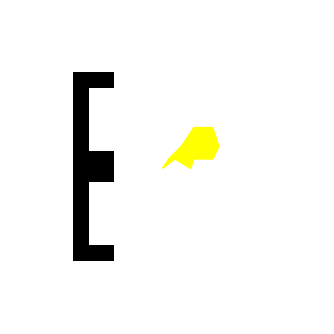

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones del logo
n = 100  # n debe ser par

# Creando un canvas blanco
logo = np.full((n, n, 3), fill_value=255, dtype=np.uint8)

# Dibujando una "E" estilizada
grosor = n // 20
logo[n//5:n//5*4, n//5:n//5+grosor] = [0, 0, 0]  # Parte vertical de la "E"
logo[n//5:n//5+grosor, n//5:n//3] = [0, 0, 0]  # Parte superior de la "E"
logo[n//2-grosor:n//2+grosor, n//5:n//3] = [0, 0, 0]  # Parte media de la "E"
logo[n//5*4-grosor:n//5*4, n//5:n//3] = [0, 0, 0]  # Parte inferior de la "E"

# Mostrando el logo
fig, ax = plt.subplots()
fig.set_size_inches(n/24.5, n/24.5)  # Convertir mm a pulgadas
ax.imshow(logo)

# Dibujando una estrella
from matplotlib.patches import Polygon
star = Polygon([[n//1.7, n//2.7], [n//1.55, n//2.7], [n//1.5, n//2.3], [n//1.55, n//2.1], [n//1.7, n//2.1], 
                [n//1.75, n//2], [n//1.9, n//2.1], [n//2.05, n//2], [n//2, n//2.1], [n//1.85, n//2.3]], fill=True, color='yellow')
ax.add_patch(star)

plt.axis('off')  # No mostrar los ejes
plt.show()